In [71]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt

In [72]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            base[x,y] = exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [73]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if distance((x,y),(u,v)) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [74]:
def hor_line(D0, image, u):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [75]:
def ver_line(D0, image, v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(y-v) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [76]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return channels

In [77]:
def dft_chnnls(channelss):
    dfts = []
    for ch in channelss:
        dfts.append(np.fft.fftshift(np.fft.fft2(ch)))
    return dfts

In [78]:
def show_dfts(chnnls_dfts,image_name):
    plt.rcParams['figure.figsize'] = [10,3]
    for i in range(len(chnnls_dfts)):
        plt.subplot(1,3,i+1)
        plt.imshow(np.log(np.abs(chnnls_dfts[i])),'gray')
        plt.suptitle('dfts of image #{}'.format(image_name))
        plt.axis('off')
    plt.show()

In [79]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p5/a/*.png")])

In [80]:
images = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images]

In [81]:
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2Lab) for img in images]

In [82]:
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) for img in images]

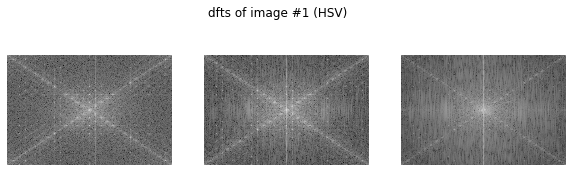

In [83]:
chs = img_chnnls(images[0])
dft = dft_chnnls(chs)
show_dfts(dft,'1 (HSV)')

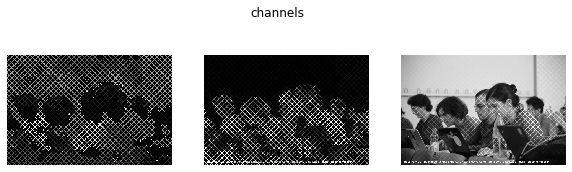

In [84]:
for i in range(len(chs)):
    plt.subplot(1,3,i+1)
    plt.imshow(chs[i],'gray')
    plt.suptitle('channels')
    plt.axis('off')
plt.show()

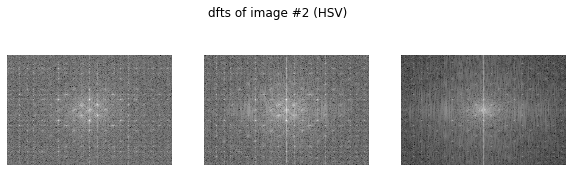

In [85]:
chs = img_chnnls(images[1])
dft = dft_chnnls(chs)
show_dfts(dft,'2 (HSV)')

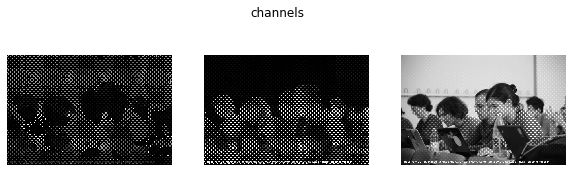

In [86]:
for i in range(len(chs)):
    plt.subplot(1,3,i+1)
    plt.imshow(chs[i],'gray')
    plt.suptitle('channels')
    plt.axis('off')
plt.show()

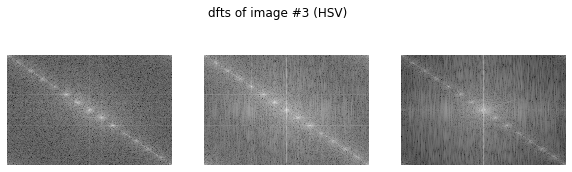

In [87]:
chs = img_chnnls(images[2])
dft = dft_chnnls(chs)
show_dfts(dft,'3 (HSV)')

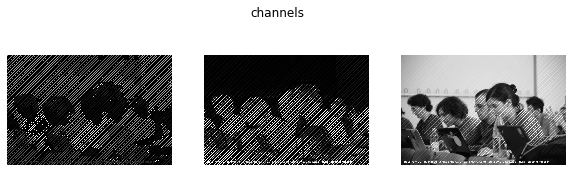

In [88]:
for i in range(len(chs)):
    plt.subplot(1,3,i+1)
    plt.imshow(chs[i],'gray')
    plt.suptitle('channels')
    plt.axis('off')
plt.show()